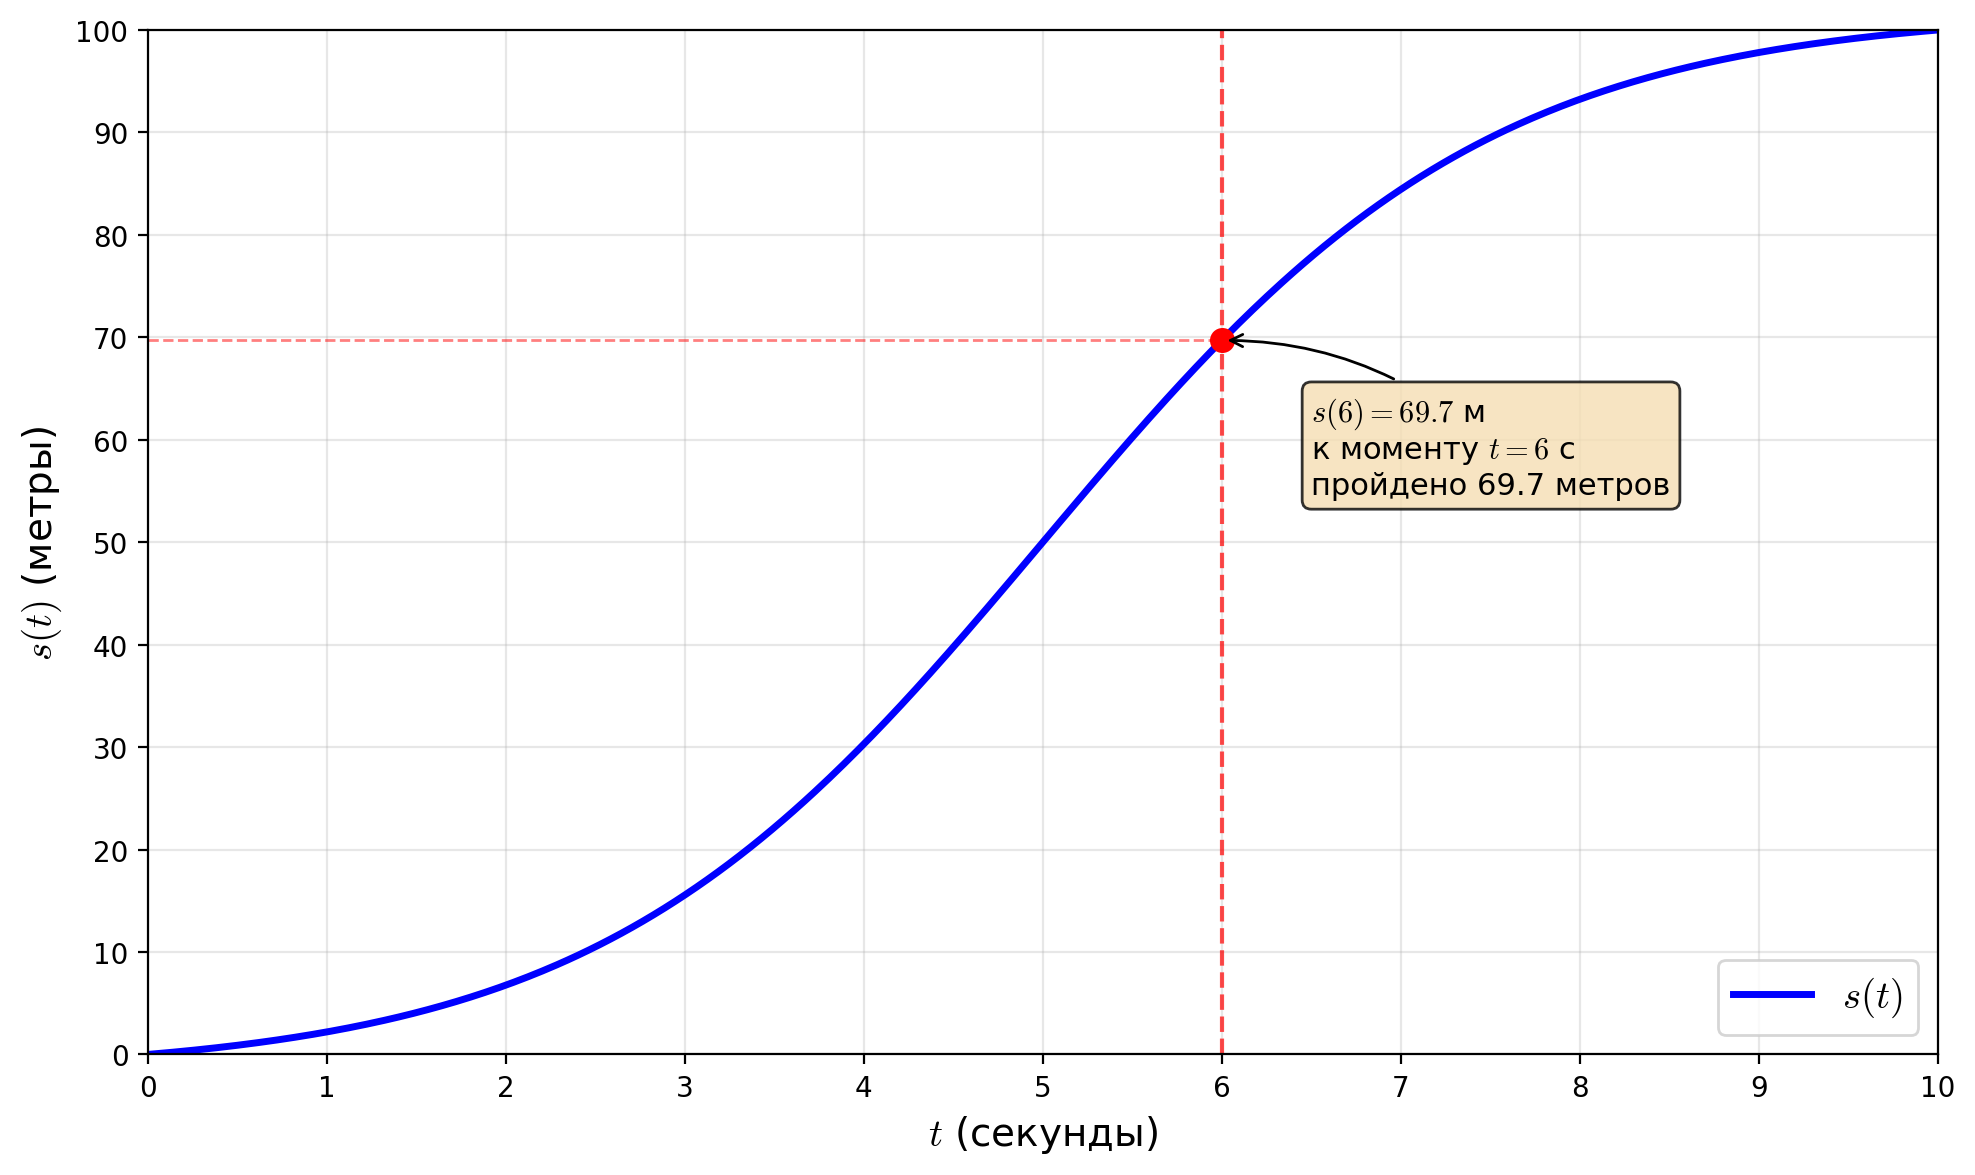

In [82]:
import numpy as np
import matplotlib.pyplot as plt

# Настройка для Retina дисплея и LaTeX
%config InlineBackend.figure_format = 'retina'
plt.rcParams['mathtext.fontset'] = 'cm'  # Computer Modern (LaTeX шрифт)

# Функция пройденного пути s(t) - сигмоида
k, c = 0.8, 5
def sigmoid(x):
    return 1 / (1 + np.exp(-k * (x - c)))
s0, s10 = sigmoid(0), sigmoid(10)
scale = 100 / (s10 - s0)

def s(t):
    return scale * (sigmoid(t) - s0)

def s_derivative(t):
    sig = sigmoid(t)
    return scale * k * sig * (1 - sig)

t = np.linspace(0, 10, 500)

# ===== Простой график s(t) =====
fig0, ax0 = plt.subplots(figsize=(10, 6), facecolor='white')
ax0.set_facecolor('white')
ax0.plot(t, s(t), 'b-', linewidth=2.5, label=r'$s(t)$')

# Вертикальная линия t=6
t_point = 6
s_point = s(t_point)
ax0.axvline(x=t_point, color='red', linestyle='--', linewidth=1.5, alpha=0.7)
ax0.plot(t_point, s_point, 'ro', markersize=8)
ax0.plot([0, t_point], [s_point, s_point], 'r--', linewidth=1, alpha=0.5)

# Аннотация
ax0.annotate(f'$s(6) = {s_point:.1f}$ м\nк моменту $t=6$ с\nпройдено {s_point:.1f} метров', 
             xy=(t_point, s_point), xytext=(t_point + 0.5, s_point - 15),
             fontsize=11, ha='left',
             bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.8),
             arrowprops=dict(arrowstyle='->', connectionstyle='arc3,rad=0.2'))

ax0.set_xlabel(r'$t$ (секунды)', fontsize=14)
ax0.set_ylabel(r'$s(t)$ (метры)', fontsize=14)
ax0.set_xlim(0, 10)
ax0.set_ylim(0, 100)
ax0.set_xticks(range(0, 11))
ax0.set_yticks(range(0, 110, 10))
ax0.legend(loc='lower right', fontsize=14)
ax0.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

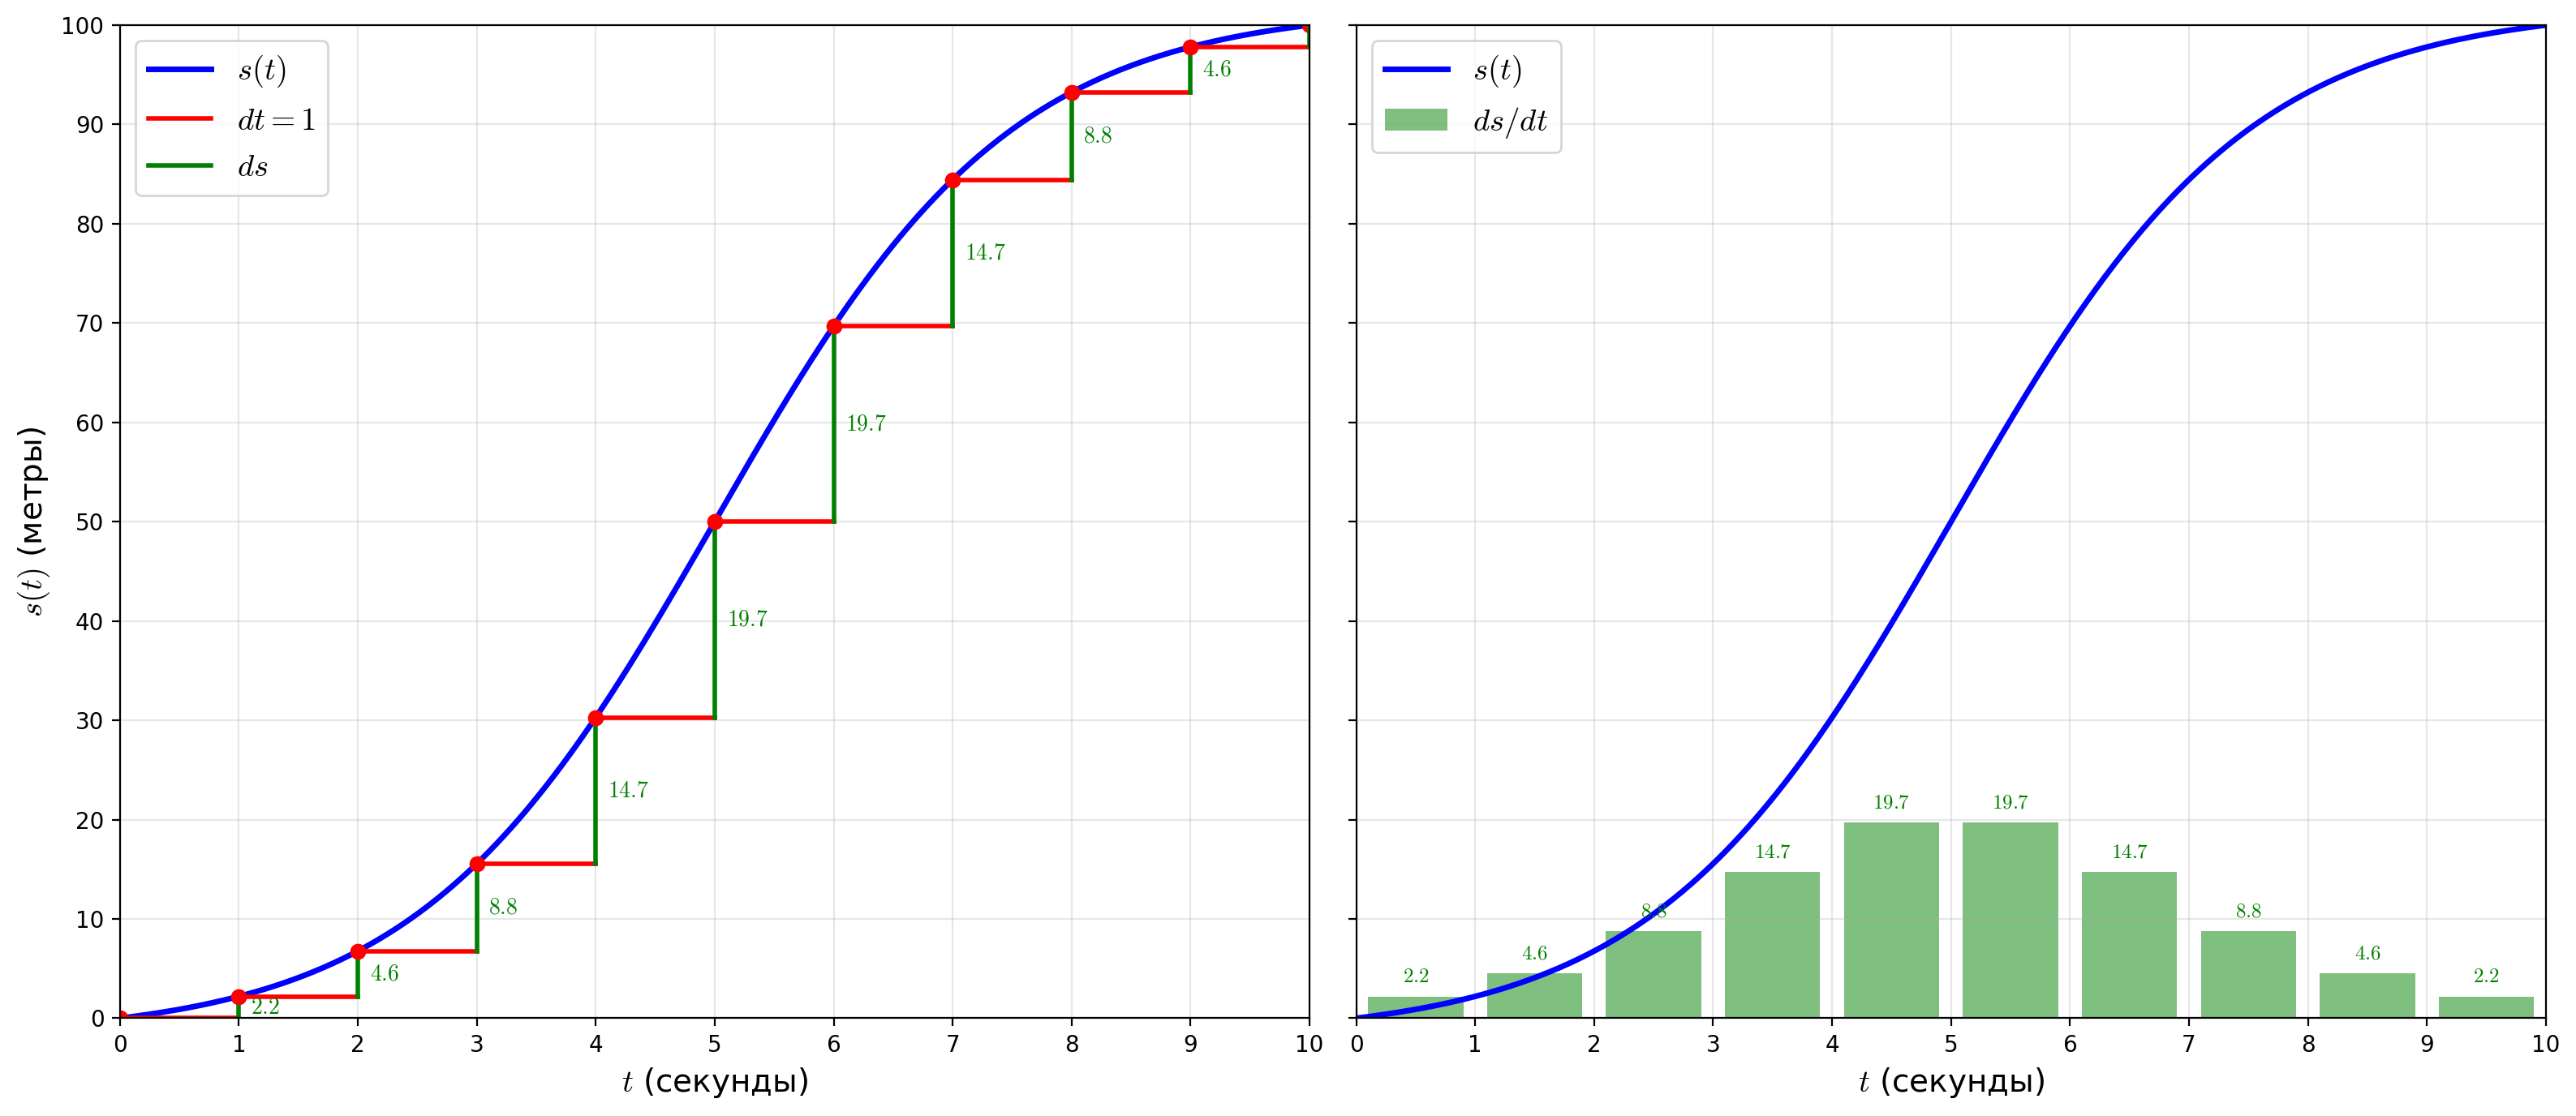

In [83]:
# ===== dt = 1 =====
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 7), facecolor='white', sharey=True)

# ===== Левый график: с dt и ds =====
ax1.set_facecolor('white')
ax1.plot(t, s(t), 'b-', linewidth=2.5, label=r'$s(t)$')

# Выделяем dt и ds для интервалов от 0 до 10
for t1 in range(0, 10):
    t2 = t1 + 1
    s1, s2 = s(t1), s(t2)
    ds_val = s2 - s1
    
    # Точки на графике
    ax1.plot([t1, t2], [s1, s2], 'ro', markersize=6)
    
    # Горизонтальная линия dt (от t1 до t2 на уровне s1)
    ax1.plot([t1, t2], [s1, s1], 'r-', linewidth=2, label=r'$dt = 1$' if t1 == 0 else '')
    
    # Вертикальная линия ds (от s1 до s2 на уровне t2)
    ax1.plot([t2, t2], [s1, s2], 'g-', linewidth=2, label=r'$ds$' if t1 == 0 else '')
    
    # Подпись ds справа от линии
    ax1.annotate(rf'${ds_val:.1f}$', xy=(t2 + 0.1, (s1 + s2) / 2), 
                fontsize=10, ha='left', va='center', color='green')

ax1.set_xlabel(r'$t$ (секунды)', fontsize=14)
ax1.set_ylabel(r'$s(t)$ (метры)', fontsize=14)
ax1.set_xlim(0, 10)
ax1.set_ylim(0, 100)
ax1.set_xticks(range(0, 11))
ax1.set_yticks(range(0, 110, 10))
ax1.legend(loc='upper left', fontsize=14)
ax1.grid(True, alpha=0.3)

# ===== Правый график: s(t) и столбики ds =====
ax2.set_facecolor('white')
ax2.plot(t, s(t), 'b-', linewidth=2.5, label=r'$s(t)$')

# Вычисляем ds/dt для каждого интервала
dt1 = 1
t_bars = np.arange(0.5, 10, dt1)  # Центры столбиков
ds_dt_values = [(s(i+1) - s(i)) / dt1 for i in range(10)]

# Столбики ds/dt
ax2.bar(t_bars, ds_dt_values, width=0.8, alpha=0.5, color='green', label=r'$ds/dt$')

# Подписи значений на столбиках
for x, y in zip(t_bars, ds_dt_values):
    ax2.annotate(rf'${y:.1f}$', xy=(x, y + 1), fontsize=9, ha='center', va='bottom', color='green')

ax2.set_xlabel(r'$t$ (секунды)', fontsize=14)
ax2.set_xlim(0, 10)
ax2.set_xticks(range(0, 11))
ax2.legend(loc='upper left', fontsize=14)

ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


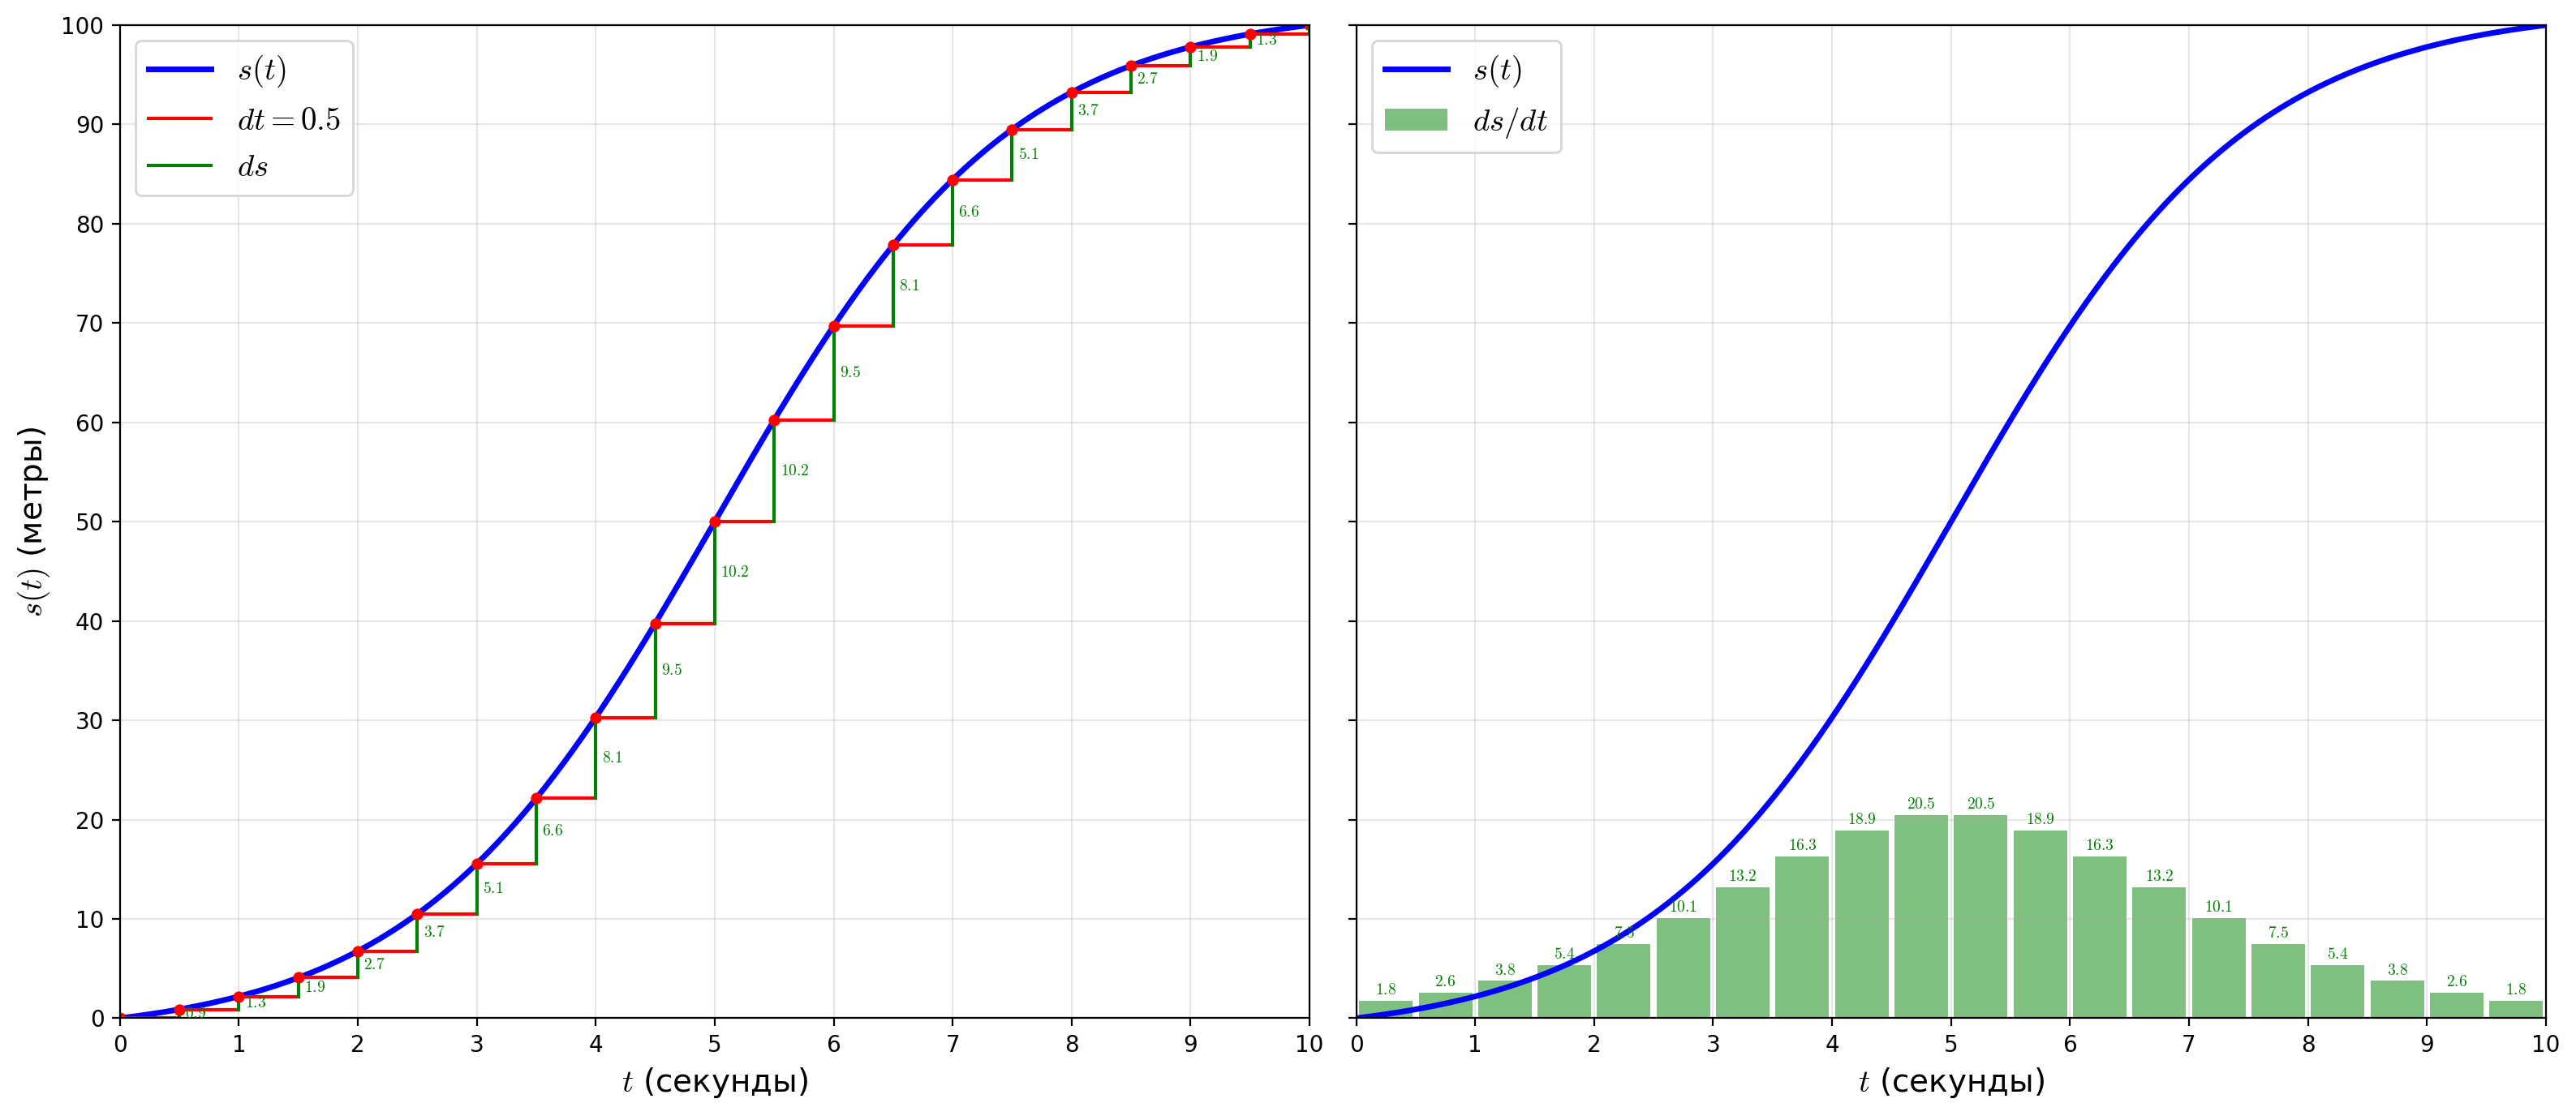

In [84]:
# ===== dt = 0.5 =====
dt_05 = 0.5
n_intervals_05 = int(10 / dt_05)  # 20 интервалов

fig2, (ax3, ax4) = plt.subplots(1, 2, figsize=(16, 7), facecolor='white', sharey=True)

# ===== Левый график: с dt и ds =====
ax3.set_facecolor('white')
ax3.plot(t, s(t), 'b-', linewidth=2.5, label=r'$s(t)$')

# Выделяем dt и ds для интервалов
for i in range(n_intervals_05):
    t1 = i * dt_05
    t2 = t1 + dt_05
    s1, s2 = s(t1), s(t2)
    ds_val = s2 - s1
    
    # Точки на графике
    ax3.plot([t1, t2], [s1, s2], 'ro', markersize=4)
    
    # Горизонтальная линия dt
    ax3.plot([t1, t2], [s1, s1], 'r-', linewidth=1.5, label=r'$dt = 0.5$' if i == 0 else '')
    
    # Вертикальная линия ds
    ax3.plot([t2, t2], [s1, s2], 'g-', linewidth=1.5, label=r'$ds$' if i == 0 else '')
    
    # Подпись ds справа от линии
    ax3.annotate(rf'${ds_val:.1f}$', xy=(t2 + 0.05, (s1 + s2) / 2), 
                fontsize=7, ha='left', va='center', color='green')

ax3.set_xlabel(r'$t$ (секунды)', fontsize=14)
ax3.set_ylabel(r'$s(t)$ (метры)', fontsize=14)
ax3.set_xlim(0, 10)
ax3.set_ylim(0, 100)
ax3.set_xticks(range(0, 11))
ax3.set_yticks(range(0, 110, 10))
ax3.legend(loc='upper left', fontsize=14)
ax3.grid(True, alpha=0.3)

# ===== Правый график: s(t) и столбики ds/dt =====
ax4.set_facecolor('white')
ax4.plot(t, s(t), 'b-', linewidth=2.5, label=r'$s(t)$')

# Вычисляем ds/dt для каждого интервала
t_bars_05 = np.arange(dt_05/2, 10, dt_05)  # Центры столбиков
ds_dt_values_05 = [(s((i+1)*dt_05) - s(i*dt_05)) / dt_05 for i in range(n_intervals_05)]

# Столбики ds/dt
ax4.bar(t_bars_05, ds_dt_values_05, width=dt_05*0.9, alpha=0.5, color='green', label=r'$ds/dt$')

# Подписи значений на столбиках
for x, y in zip(t_bars_05, ds_dt_values_05):
    ax4.annotate(rf'${y:.1f}$', xy=(x, y + 0.3), fontsize=7, ha='center', va='bottom', color='green')

ax4.set_xlabel(r'$t$ (секунды)', fontsize=14)
ax4.set_xlim(0, 10)
ax4.set_xticks(range(0, 11))
ax4.legend(loc='upper left', fontsize=14)

ax4.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


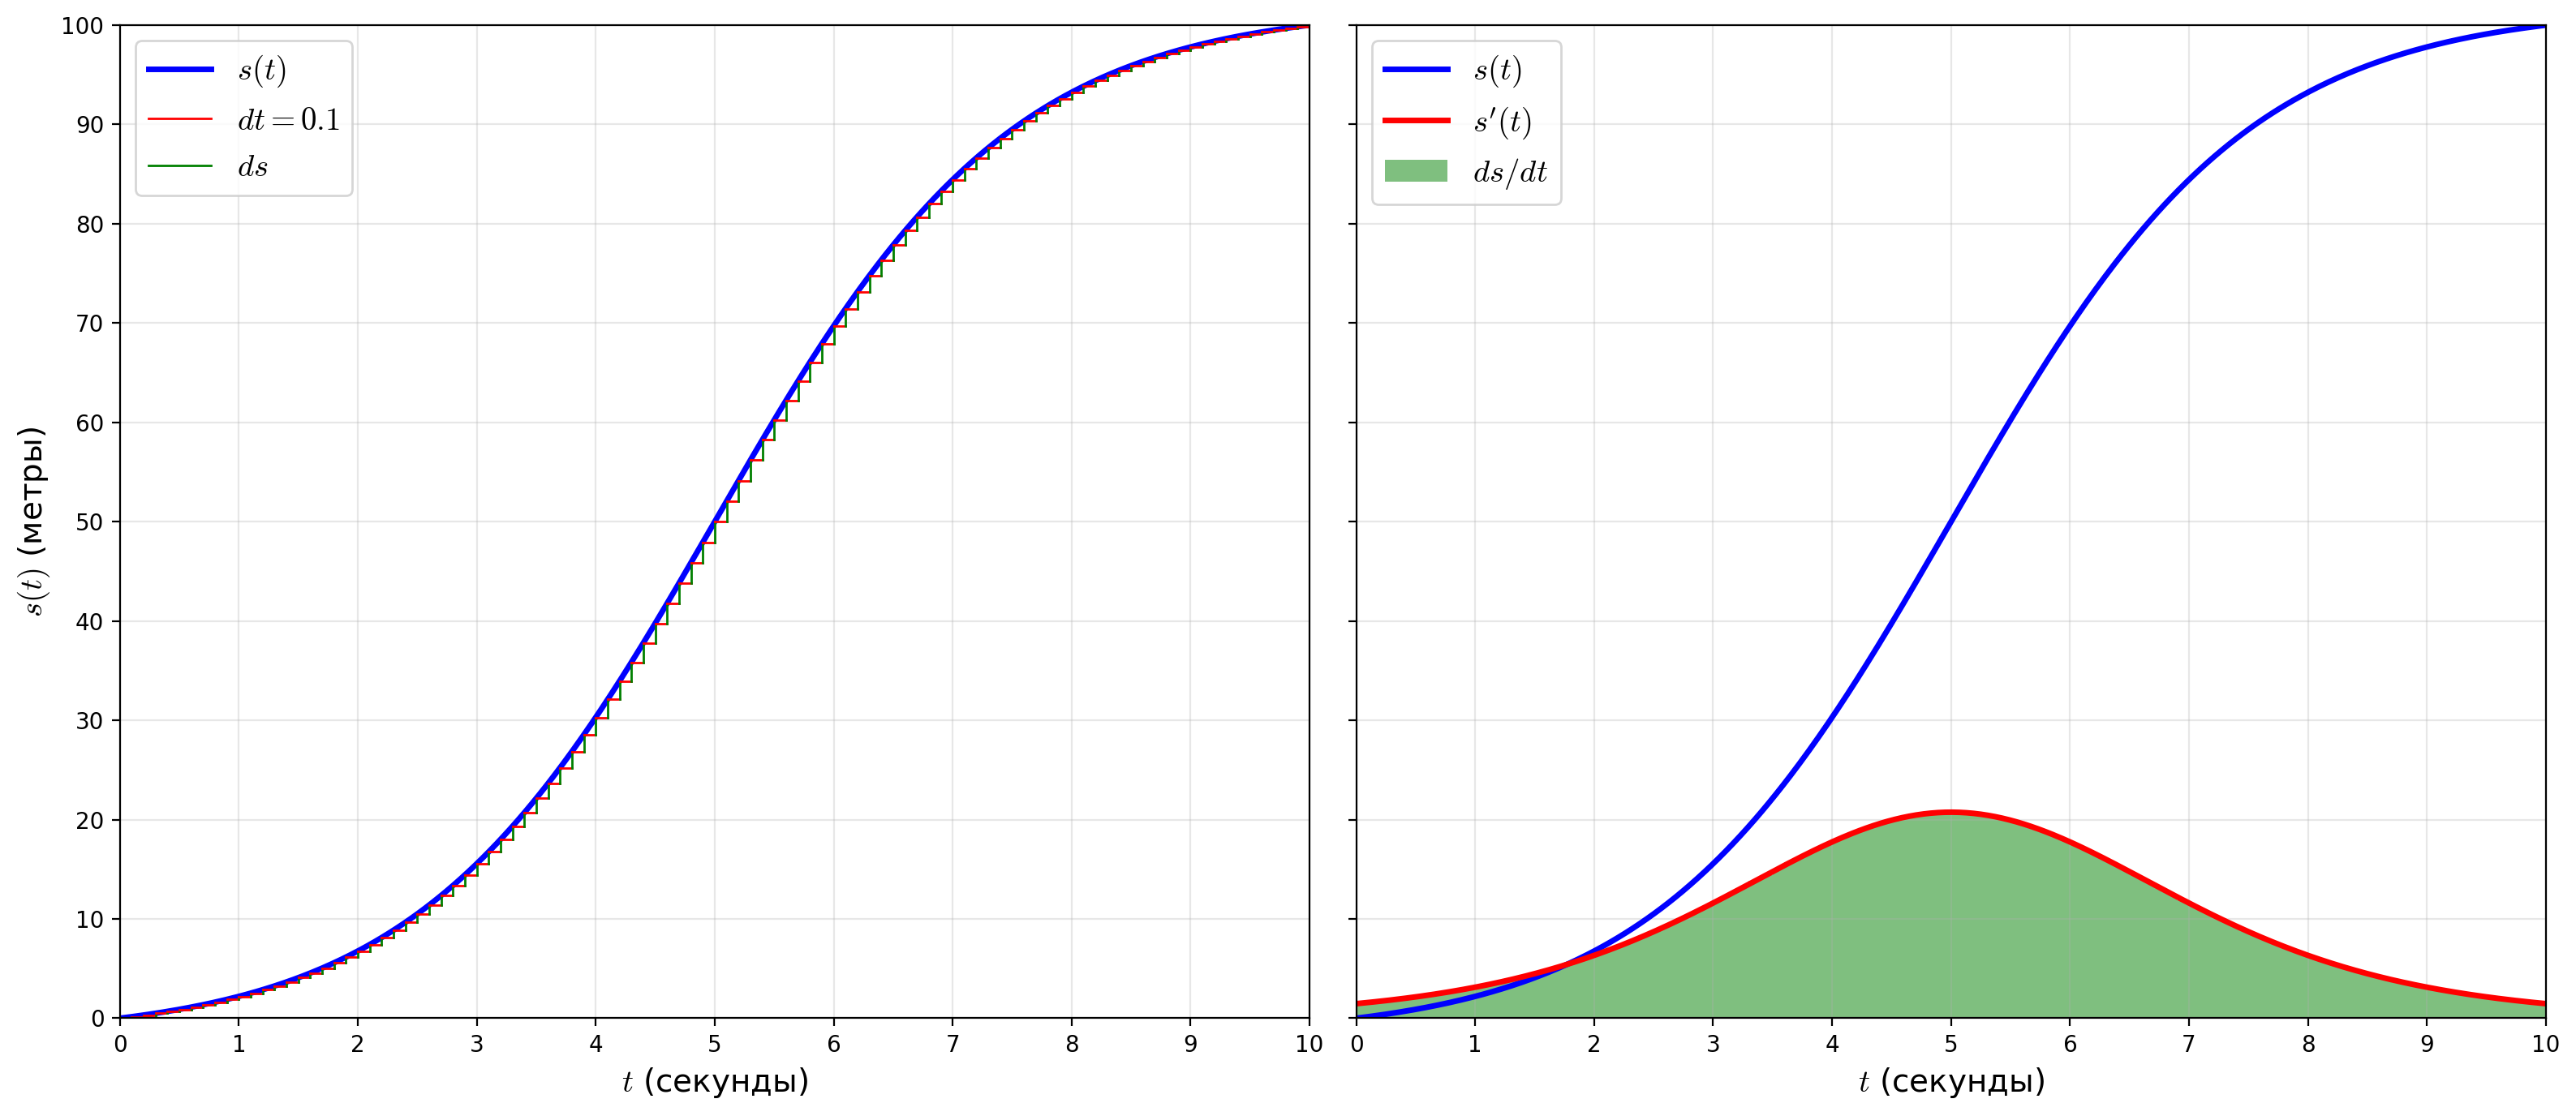

In [85]:
# ===== dt = 0.1 =====
dt_01 = 0.1
n_intervals_01 = int(10 / dt_01)  # 100 интервалов

fig3, (ax5, ax6) = plt.subplots(1, 2, figsize=(16, 7), facecolor='white', sharey=True)

# ===== Левый график: с dt и ds =====
ax5.set_facecolor('white')
ax5.plot(t, s(t), 'b-', linewidth=2.5, label=r'$s(t)$')

# Выделяем dt и ds для интервалов
for i in range(n_intervals_01):
    t1 = i * dt_01
    t2 = t1 + dt_01
    s1, s2 = s(t1), s(t2)
    
    # Горизонтальная линия dt
    ax5.plot([t1, t2], [s1, s1], 'r-', linewidth=1, label=r'$dt = 0.1$' if i == 0 else '')
    
    # Вертикальная линия ds
    ax5.plot([t2, t2], [s1, s2], 'g-', linewidth=1, label=r'$ds$' if i == 0 else '')

ax5.set_xlabel(r'$t$ (секунды)', fontsize=14)
ax5.set_ylabel(r'$s(t)$ (метры)', fontsize=14)
ax5.set_xlim(0, 10)
ax5.set_ylim(0, 100)
ax5.set_xticks(range(0, 11))
ax5.set_yticks(range(0, 110, 10))
ax5.legend(loc='upper left', fontsize=14)
ax5.grid(True, alpha=0.3)

# ===== Правый график: s(t) и столбики ds =====
ax6.set_facecolor('white')
ax6.plot(t, s(t), 'b-', linewidth=2.5, label=r'$s(t)$')

# Вычисляем ds/dt для каждого интервала
t_bars_01 = np.arange(dt_01/2, 10, dt_01)  # Центры столбиков
ds_dt_values_01 = [(s((i+1)*dt_01) - s(i*dt_01)) / dt_01 for i in range(n_intervals_01)]

# Столбики ds/dt
ax6.bar(t_bars_01, ds_dt_values_01, width=dt_01, alpha=0.5, color='green', label=r'$ds/dt$')

# Линия производной s'(t)
ax6.plot(t, s_derivative(t), 'r-', linewidth=2.5, label=r"$s'(t)$")

ax6.set_xlabel(r'$t$ (секунды)', fontsize=14)
ax6.set_xlim(0, 10)
ax6.set_xticks(range(0, 11))
ax6.legend(loc='upper left', fontsize=14)

ax6.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


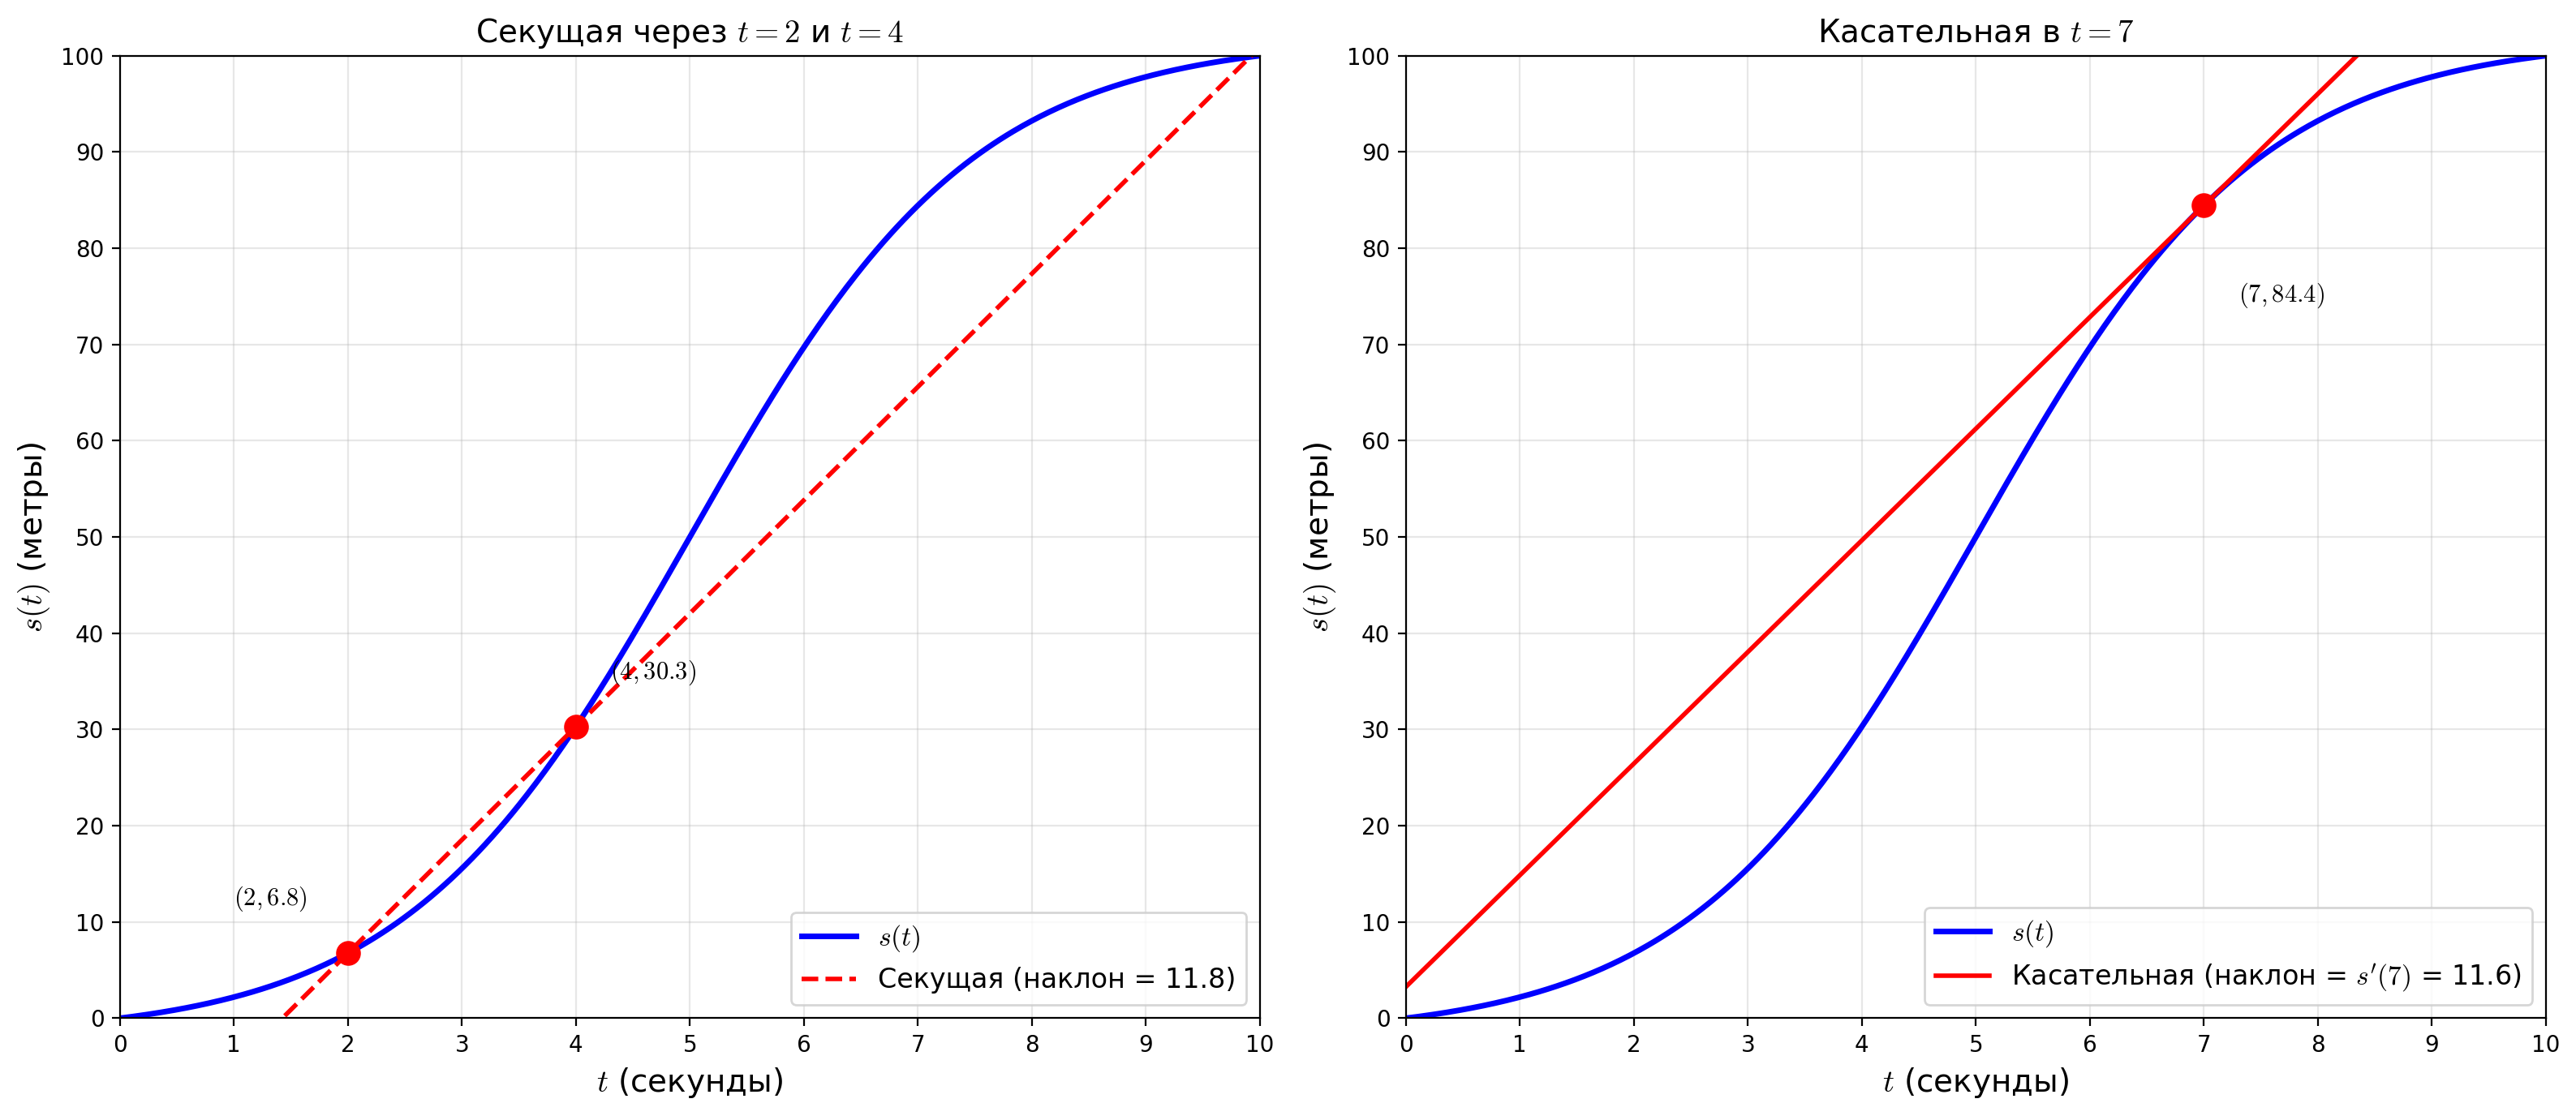

In [86]:
# ===== Секущая и касательная =====
fig4, (ax7, ax8) = plt.subplots(1, 2, figsize=(16, 7), facecolor='white')

# ===== Левый график: секущая через t=2 и t=4 =====
ax7.set_facecolor('white')
ax7.plot(t, s(t), 'b-', linewidth=2.5, label=r'$s(t)$')

# Точки для секущей
t1_sec, t2_sec = 2, 4
s1_sec, s2_sec = s(t1_sec), s(t2_sec)

# Секущая линия
slope_sec = (s2_sec - s1_sec) / (t2_sec - t1_sec)
t_line = np.linspace(0, 10, 100)
secant_line = s1_sec + slope_sec * (t_line - t1_sec)
ax7.plot(t_line, secant_line, 'r--', linewidth=2, label=f'Секущая (наклон = {slope_sec:.1f})')

# Точки на графике
ax7.plot([t1_sec, t2_sec], [s1_sec, s2_sec], 'ro', markersize=10)
ax7.annotate(f'$(2, {s1_sec:.1f})$', xy=(t1_sec, s1_sec), xytext=(t1_sec - 1, s1_sec + 5), fontsize=11)
ax7.annotate(f'$(4, {s2_sec:.1f})$', xy=(t2_sec, s2_sec), xytext=(t2_sec + 0.3, s2_sec + 5), fontsize=11)

ax7.set_xlabel(r'$t$ (секунды)', fontsize=14)
ax7.set_ylabel(r'$s(t)$ (метры)', fontsize=14)
ax7.set_xlim(0, 10)
ax7.set_ylim(0, 100)
ax7.set_xticks(range(0, 11))
ax7.set_yticks(range(0, 110, 10))
ax7.legend(loc='lower right', fontsize=12)
ax7.set_title('Секущая через $t=2$ и $t=4$', fontsize=14)
ax7.grid(True, alpha=0.3)

# ===== Правый график: касательная в t=7 =====
ax8.set_facecolor('white')
ax8.plot(t, s(t), 'b-', linewidth=2.5, label=r'$s(t)$')

# Точка касания
t_tan = 7
s_tan = s(t_tan)
slope_tan = s_derivative(t_tan)  # Производная = наклон касательной

# Касательная линия
tangent_line = s_tan + slope_tan * (t_line - t_tan)
ax8.plot(t_line, tangent_line, 'r-', linewidth=2, label=f"Касательная (наклон = $s'(7)$ = {slope_tan:.1f})")

# Точка на графике
ax8.plot(t_tan, s_tan, 'ro', markersize=10)
ax8.annotate(f'$(7, {s_tan:.1f})$', xy=(t_tan, s_tan), xytext=(t_tan + 0.3, s_tan - 10), fontsize=11)

ax8.set_xlabel(r'$t$ (секунды)', fontsize=14)
ax8.set_ylabel(r'$s(t)$ (метры)', fontsize=14)
ax8.set_xlim(0, 10)
ax8.set_ylim(0, 100)
ax8.set_xticks(range(0, 11))
ax8.set_yticks(range(0, 110, 10))
ax8.legend(loc='lower right', fontsize=12)
ax8.set_title("Касательная в $t=7$", fontsize=14)
ax8.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


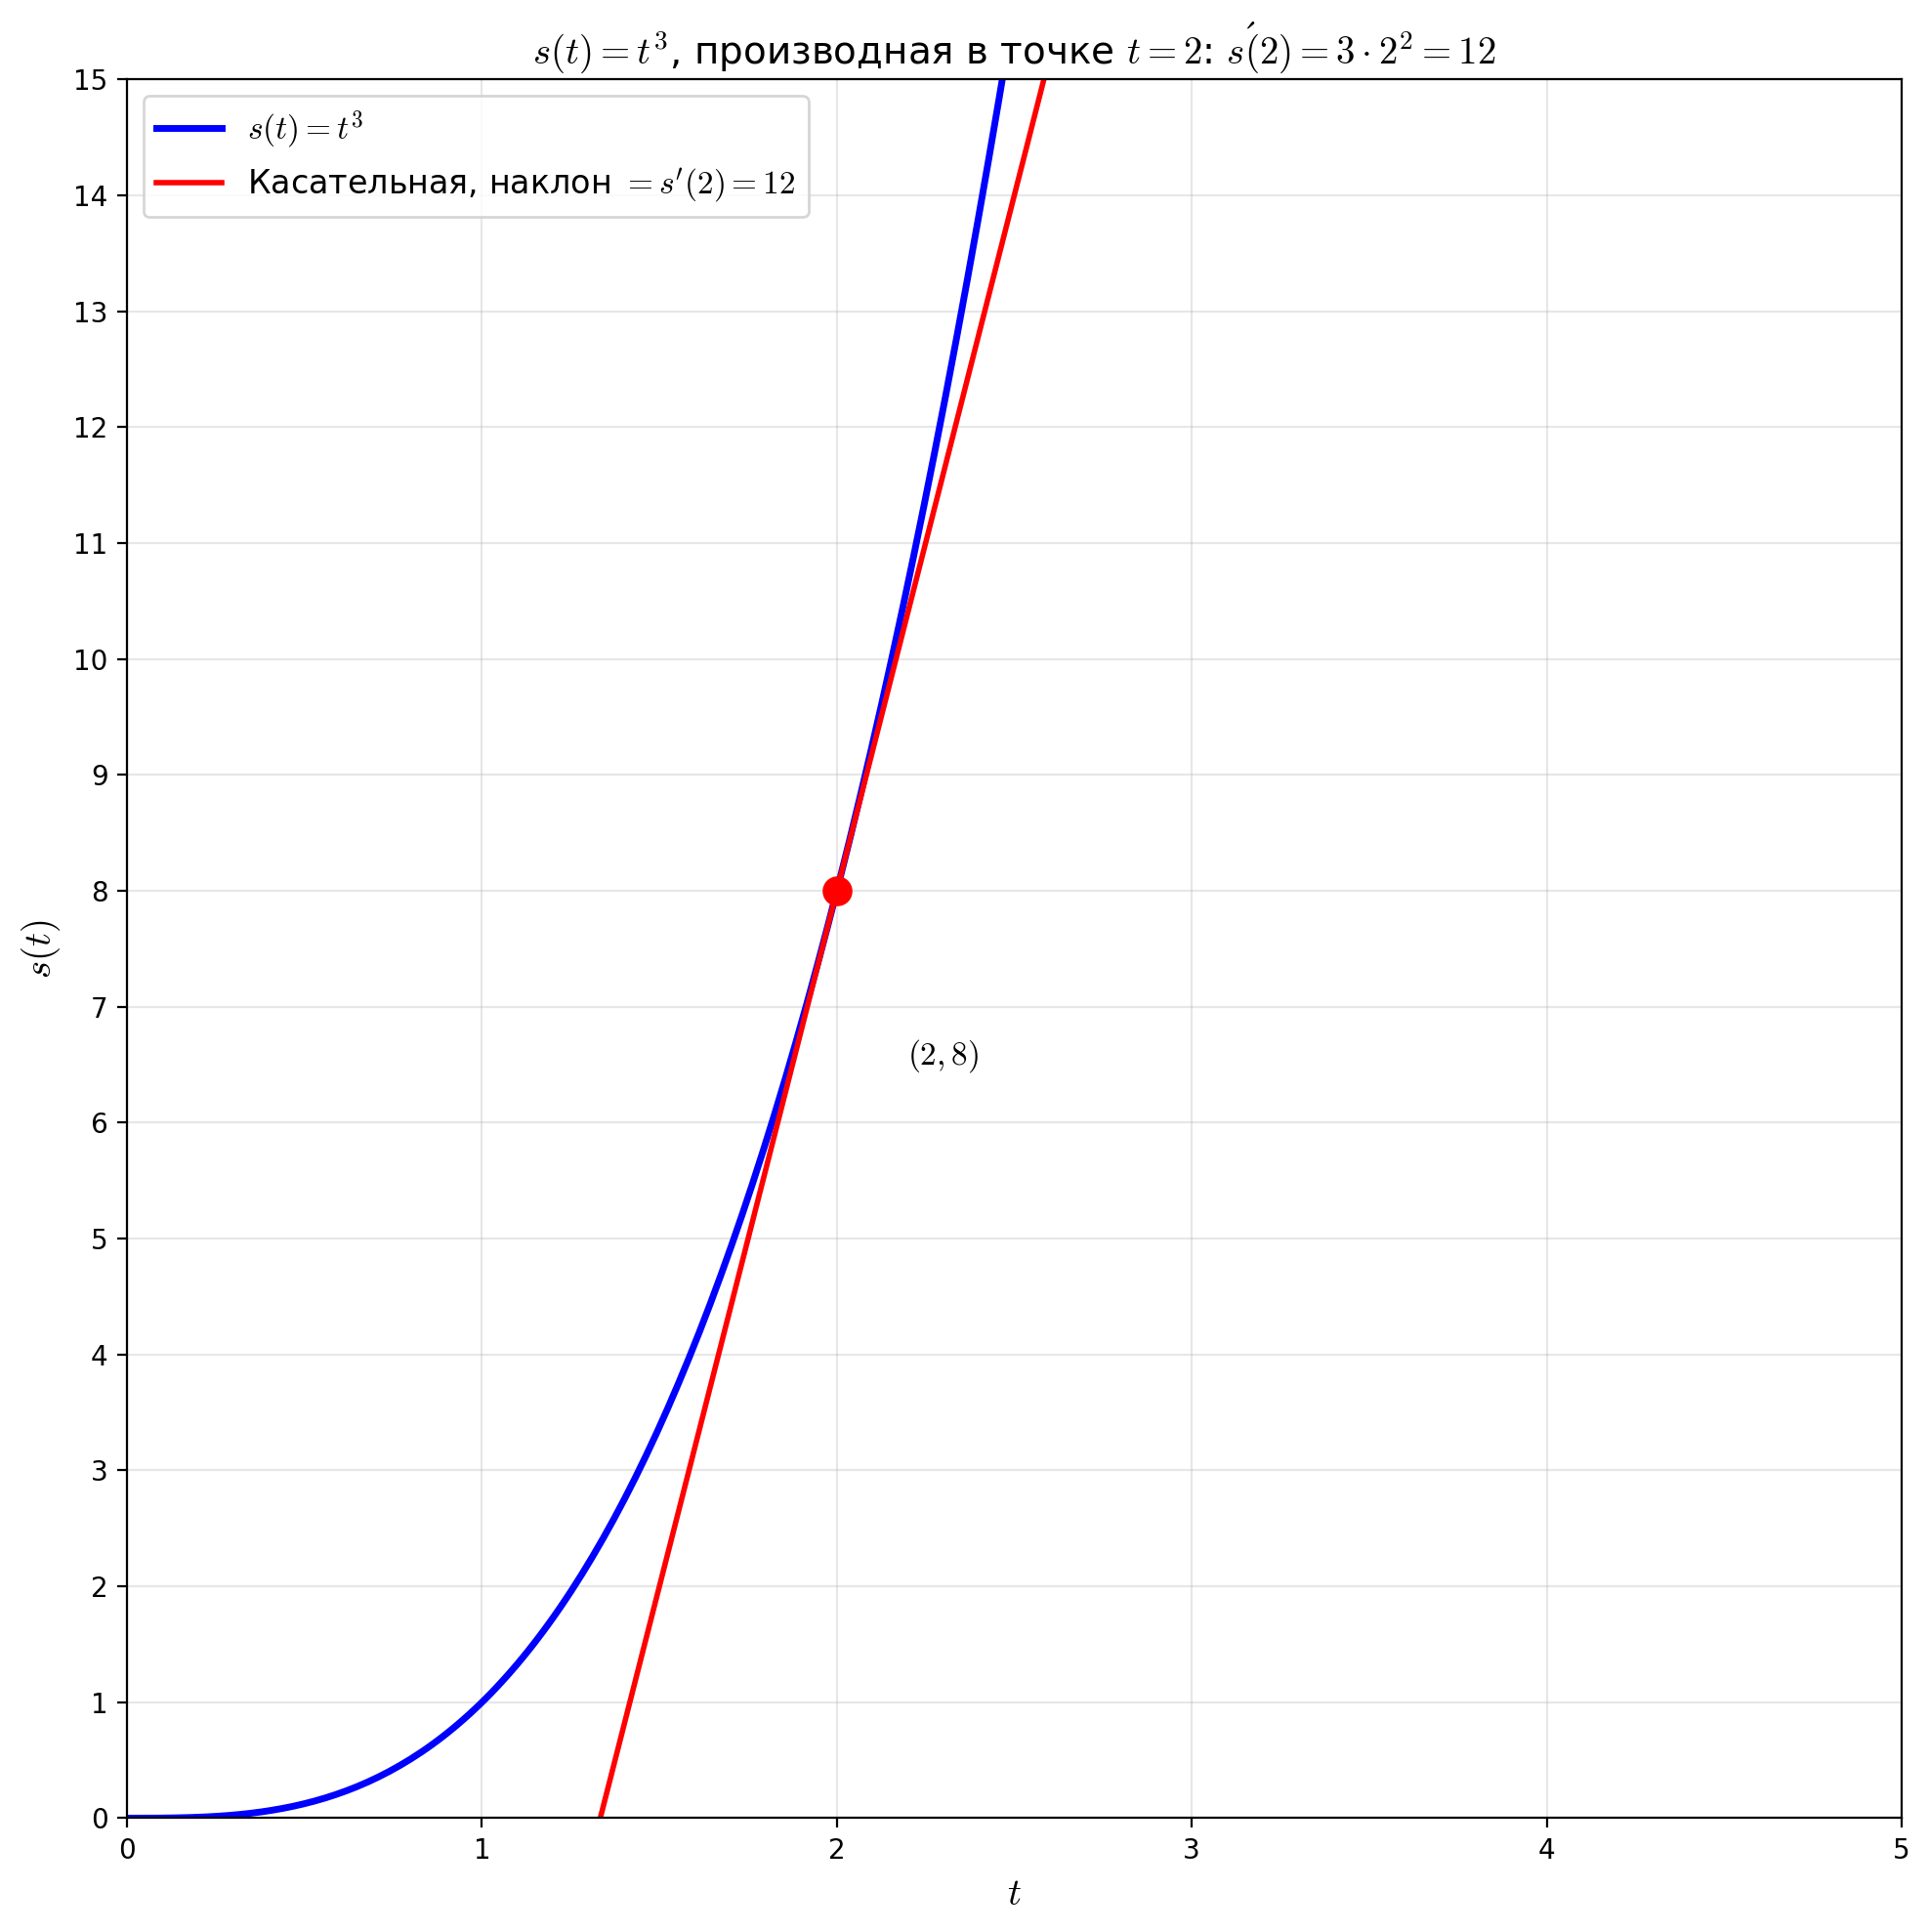

In [87]:
# ===== Пример: s(t) = t³, касательная в t=2 =====
fig5, ax9 = plt.subplots(figsize=(10, 10), facecolor='white')
ax9.set_facecolor('white')

# Функция s(t) = t³
t_cubic = np.linspace(0, 3, 200)
s_cubic = t_cubic ** 3

ax9.plot(t_cubic, s_cubic, 'b-', linewidth=2.5, label=r'$s(t) = t^3$')

# Точка касания t=2
t_point = 2
s_point = t_point ** 3  # = 8
slope = 3 * t_point ** 2  # Производная 3t² при t=2 = 12

# Касательная линия: y - 8 = 12(t - 2)  =>  y = 12t - 16
t_tan_line = np.linspace(0.5, 3, 100)
tangent = slope * (t_tan_line - t_point) + s_point

ax9.plot(t_tan_line, tangent, 'r-', linewidth=2, label=rf"Касательная, наклон $= s'(2) = 12$")

# Точка на графике
ax9.plot(t_point, s_point, 'ro', markersize=10)
ax9.annotate(r'$(2, 8)$', xy=(t_point, s_point), xytext=(t_point + 0.2, s_point - 1.5), fontsize=12)

ax9.set_xlabel(r'$t$', fontsize=14)
ax9.set_ylabel(r'$s(t)$', fontsize=14)
ax9.set_xlim(0, 5)
ax9.set_ylim(0, 15)
ax9.set_yticks(range(0, 16, 1))
ax9.set_title(r'$s(t) = t^3$, производная в точке $t=2$: $s\'(2) = 3 \cdot 2^2 = 12$', fontsize=14)
ax9.legend(loc='upper left', fontsize=12)
ax9.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()
